# CSE 6369 - Spring 2023 - Homework 1


## Student Name: Daniel Evilsizor


## Student ID: 1000408341

# Install packages

In [1]:
!pip install gymnasium==0.27.1 -q
!pip install gymnasium[box2d] -q
!pip install moviepy -q
!pip install -U kora -q

# Import libraries

In [2]:
import pickle
import random
import argparse
import moviepy
import matplotlib.pyplot as plt
import seaborn as sns
from kora.drive import upload_public
from google.colab import drive

drive.mount('/content/gdrive')
%cd gdrive/MyDrive/assign_01/

from learning_algorithms import PGTrainer
from utils import seed_everything

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/assign_01


# Train an agent

In [12]:
# set simulation parameters
params = {
    'env_name': 'CartPole-v1',
    'rng_seed': 6369,
    'reward_to_go': False,
    'reward_discount': True,
    'n_rollout': 100,
    'n_trajectory_per_rollout': 10,
    'hidden_dim': 64,
    'lr': 3e-3,
    'exp_name': 'CartPole_v1_t2'
}

# Seed RNGs
seed_everything(params['rng_seed'])

# Train agent
trainer = PGTrainer(params)
trainer.run_training_loop()

End of rollout 0: Average trajectory reward is  15.30
End of rollout 1: Average trajectory reward is  24.30
End of rollout 2: Average trajectory reward is  19.30
End of rollout 3: Average trajectory reward is  23.40
End of rollout 4: Average trajectory reward is  21.90
End of rollout 5: Average trajectory reward is  25.20
End of rollout 6: Average trajectory reward is  29.30
End of rollout 7: Average trajectory reward is  42.10
End of rollout 8: Average trajectory reward is  26.80
End of rollout 9: Average trajectory reward is  29.60
End of rollout 10: Average trajectory reward is  37.10
End of rollout 11: Average trajectory reward is  50.10
End of rollout 12: Average trajectory reward is  41.50
End of rollout 13: Average trajectory reward is  45.30
End of rollout 14: Average trajectory reward is  36.10
End of rollout 15: Average trajectory reward is  58.20
End of rollout 16: Average trajectory reward is  36.20
End of rollout 17: Average trajectory reward is  53.80
End of rollout 18: A

Moviepy - Done !
Moviepy - video ready /content/gdrive/MyDrive/assign_01/CartPole/rl-video-episode-0.mp4


# Display Video

In [13]:
# (ref: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive)
# Upload video
url = upload_public('CartPole/rl-video-episode-0.mp4')
# Then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

# Visualize learning curve

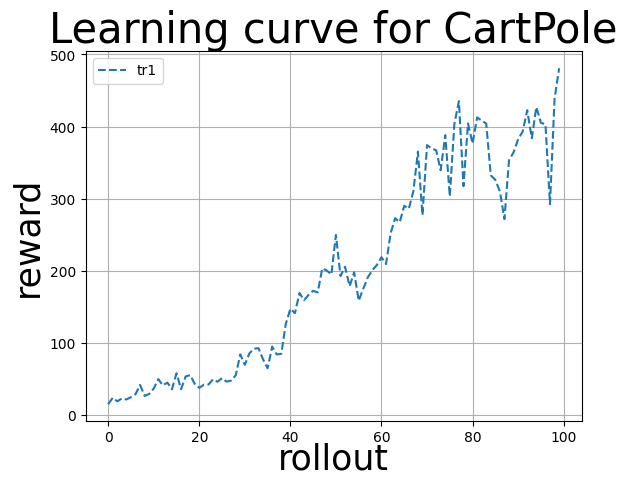

In [14]:
# (ref: http://rail.eecs.berkeley.edu/deeprlcourse/static/misc/viz.pdf)
file_name = params['exp_name'] + '.pkl'
with open(file_name, 'rb') as f:
    ro_reward = pickle.load(f)

# Plot the data
sns.lineplot(data=ro_reward, linestyle='--', label='tr1')
plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for CartPole', fontsize=30)
plt.legend()
plt.grid()
plt.show()

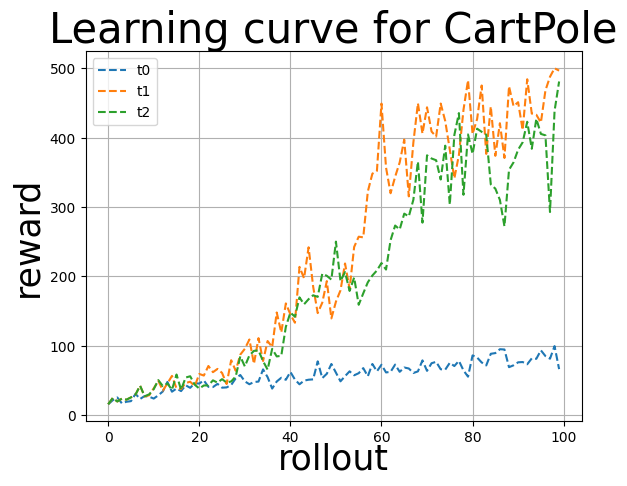

In [16]:
# (ref: http://rail.eecs.berkeley.edu/deeprlcourse/static/misc/viz.pdf)
#file_name = params['exp_name'] + '.pkl'
experiments = ['CartPole_v1_t0', 'CartPole_v1_t1', 'CartPole_v1_t2']
for e in range(len(experiments)):
  with open (experiments[e]+'.pkl', 'rb') as f:
    ro_reward = pickle.load(f)
    sns.lineplot(data=ro_reward, linestyle='--', label='t'+str(e))

plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for CartPole', fontsize=30)
plt.legend()
plt.grid()
plt.show()

In [21]:
# set simulation parameters
params = {
    'env_name': 'LunarLander-v2',
    'rng_seed': 6369,
    'reward_to_go': False,
    'reward_discount': True,
    'n_rollout': 125,
    'n_trajectory_per_rollout': 60,
    'hidden_dim': 128,
    'lr': 3e-3,
    'exp_name': 'LunarLand_v2_t2'
}

# Seed RNGs
seed_everything(params['rng_seed'])

# Train agent
trainer = PGTrainer(params)
trainer.run_training_loop()

End of rollout 0: Average trajectory reward is -195.66
End of rollout 1: Average trajectory reward is -173.71
End of rollout 2: Average trajectory reward is -147.30
End of rollout 3: Average trajectory reward is -151.77
End of rollout 4: Average trajectory reward is -134.35
End of rollout 5: Average trajectory reward is -122.29
End of rollout 6: Average trajectory reward is -118.49
End of rollout 7: Average trajectory reward is -131.91
End of rollout 8: Average trajectory reward is -136.62
End of rollout 9: Average trajectory reward is -129.51
End of rollout 10: Average trajectory reward is -133.24
End of rollout 11: Average trajectory reward is -125.39
End of rollout 12: Average trajectory reward is -120.69
End of rollout 13: Average trajectory reward is -129.60
End of rollout 14: Average trajectory reward is -128.90
End of rollout 15: Average trajectory reward is -132.89
End of rollout 16: Average trajectory reward is -123.80
End of rollout 17: Average trajectory reward is -114.25
En

Moviepy - Done !
Moviepy - video ready /content/gdrive/MyDrive/assign_01/LunarLander/rl-video-episode-0.mp4


In [20]:
# (ref: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive)
# Upload video
url = upload_public('LunarLander/rl-video-episode-0.mp4')
# Then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

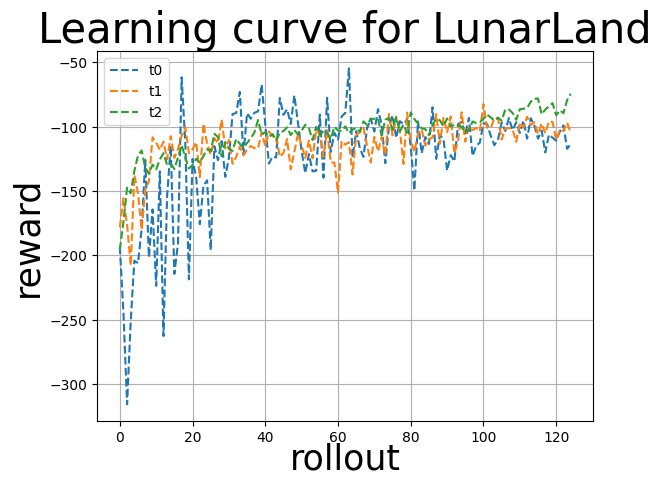

In [22]:
# (ref: http://rail.eecs.berkeley.edu/deeprlcourse/static/misc/viz.pdf)
#file_name = params['exp_name'] + '.pkl'
experiments = ['LunarLand_v2_t0', 'LunarLand_v2_t1', 'LunarLand_v2_t2']
for e in range(len(experiments)):
  with open (experiments[e]+'.pkl', 'rb') as f:
    ro_reward = pickle.load(f)
    sns.lineplot(data=ro_reward, linestyle='--', label='t'+str(e))

plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for LunarLand', fontsize=30)
plt.legend()
plt.grid()
plt.show()